In [143]:
import sys         
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [144]:
class Particle:
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf):
        ns = noise_rate_pdf.rvs()
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[2]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(noised_nu, noised_omega, time, self.pose)

In [158]:
class Mcl:
    def __init__(self, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}):
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time):
        for p in self.particles:
            p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems):
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles]
        vys = [math.sin(p.pose[2]) for p in self.particles]
        elems.append(ax.quiver(xs, ys, vxs, vys, color ="blue", alpha=0.5))

In [159]:
class EstimationAgent(Agent):
    def __init__(self, time_interval, nu, omega, estimator):
        super().__init__(nu, omega)
        self.time_interval = time_interval
        self.estimator = estimator
        
        self.prev_nu = 0.0
        self.prev_omega = 0.0
        
    def decision(self, observation=None):
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)

In [160]:
# world = World(3, 0.1)

# ### 地図を生成して3つランドマークを追加 ###
# m = Map()
# for ln in [(-4,2), (2,-3), (3,3)]: m.append_landmark(Landmark(*ln))
# world.append(m)       

# ### ロボットを作る ###
# initial_pose = np.array([2, 2, math.pi/6]).T
# estimator = Mcl(initial_pose, 100)
# circling = EstimationAgent(0.2, 10.0/180*math.pi, estimator)
# r = Robot(initial_pose, sensor=Camera(m), agent=circling) 
# world.append(r)

# ### アニメーション実行 ###
# world.draw()

In [161]:
# initial_pose = np.array([0,0,0]).T
# estimator = Mcl(initial_pose, 100, motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})
# a = EstimationAgent(0.1, 0.2, 10.0/180*math.pi, estimator)
# estimator.motion_update(0.2, 10.0/180*math.pi, 0.1)
# for p in estimator.particles:
#     print(p.pose)

<IPython.core.display.Javascript object>


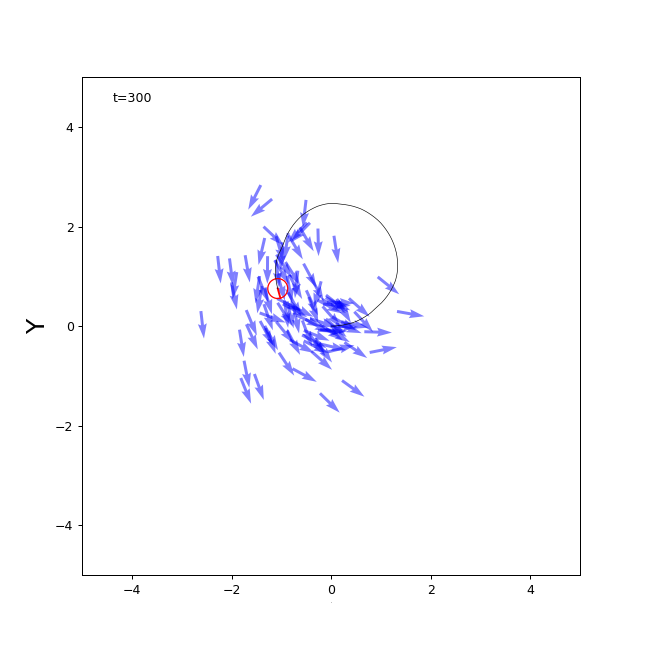

In [164]:
def trial():
    time_interval = 0.1
    world = World(30, time_interval)
    
    initial_pose = np.array([0,0,0]).T
    estimator = Mcl(initial_pose, 100)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
#     straight = EstimationAgent(time_interval, 0.1, 0.0, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red")
    world.append(r)
    
    world.draw()
    
    
trial()

<IPython.core.display.Javascript object>


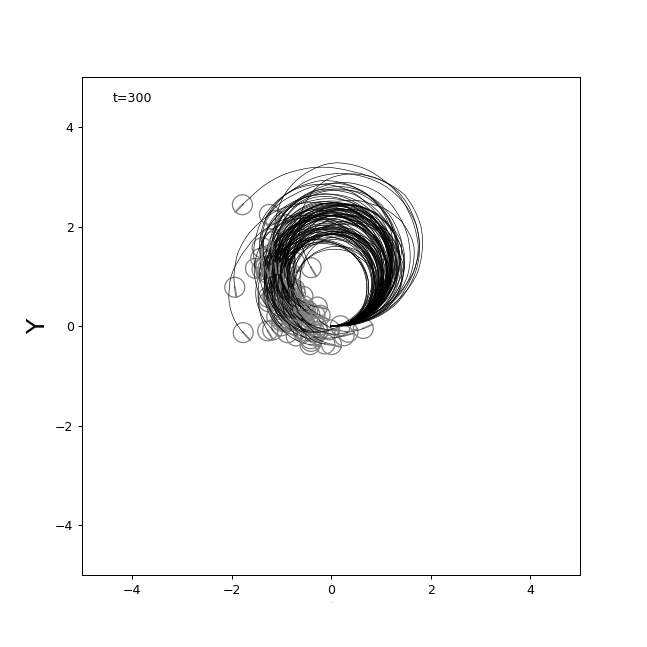

In [165]:
time_interval = 0.1  ###draw_mcl7###
world = World(30, time_interval) 

for i in range(100):
    r = Robot(np.array([0, 0, 0]).T, sensor=None, agent=Agent(0.2, 10.0/180*math.pi), color="gray" )
    world.append(r)

world.draw()